In [103]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from dataPath import DATA_PATH
# %matplotlib inline

# import matplotlib
# matplotlib.rcParams['figure.figsize'] = (8.0,8.0)
# matplotlib.rcParams['image.cmap'] = 'gray'
# matplotlib.rcParams['image.interpolation'] = 'bilinear'

## Blend two images cv2.addWeighted

- The cv2.addWeighted is used to blend two images together using a weighted sum. 
- This function allows you to control the transparency of each image in the blend, creating effects such as image overlays and transitions.

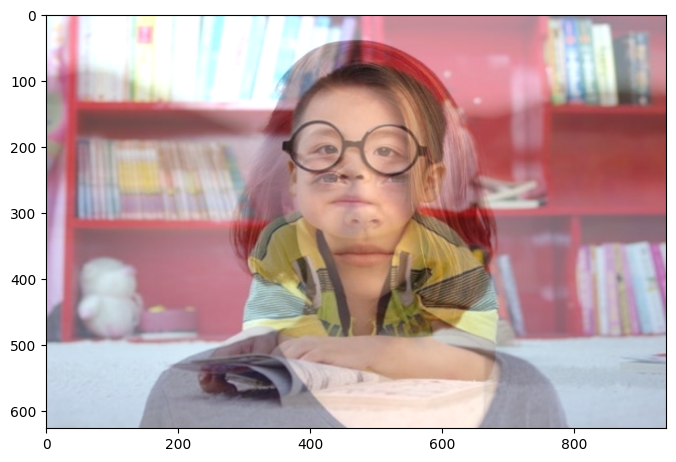

In [138]:
imGirl = cv2.imread(DATA_PATH + "images/girl.jpg")
imGirl = cv2.cvtColor(imGirl, cv2.COLOR_BGR2RGB)
imSunglass = cv2.imread(DATA_PATH + "images/boy.jpg")
imSunglass = cv2.cvtColor(imSunglass, cv2.COLOR_BGR2RGB)
imSunglass = cv2.resize(imSunglass, (imGirl.shape[1], imGirl.shape[0]))

imColor = cv2.addWeighted(imGirl, 0.6, imSunglass, 0.6, 0)
plt.imshow(imColor)

' \nWrinkles\n\n1. Create extra points like forehead points and attach reference points for stretching\n2. Get Landmarks points for both image\n3. Append forhead points\n4. Calculate delaunay Trianlges of points1\n5. Apply warp triangle using dt\n6. Create face mask of points2 and \n    6.1 create convex hull\n    6.2 create mask using convex hull index\n    6.3 remove nose, mouth and eye  (replace with black color)\n7. Apply seamless cloning\n8. Apply blur on forehead to match\n'

## Bitwise And operation

- The cv2.bitwise_and() is used to perform a bitwise AND operation on two images or an image and a mask. 
- This operation is useful for masking parts of an image, where only the regions where both the image and the mask have non-zero values are retained.

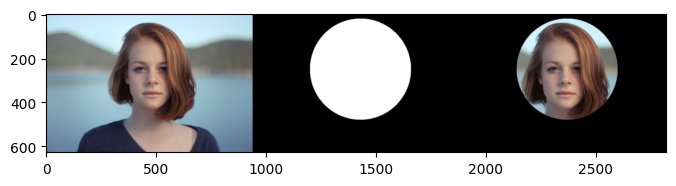

In [119]:
im = cv2.imread(DATA_PATH + "images/girl.jpg")
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)

mask = np.zeros_like(im)
cv2.circle(mask,(490,250),230,(255,255,255),thickness=-1)

masked_image = cv2.bitwise_and(im,mask)

stack = np.hstack((im,mask,masked_image))
plt.imshow(stack)

## Ordinary Procrustes Analysis:

Extract translation, rotation and scaling 

In [63]:


#  Find Centroid np.mean
points1 = np.array([[1], [3], [5]], dtype=np.float32)   #Centroid [3,4]
points2 = np.array([[3], [5],[1]], dtype=np.float32)   #Centroid [3,4]
# points1 = np.array([[1], [3], [5]], dtype=np.float32)   #Centroid [3]
# points1 = np.array([1, 3, 5], dtype=np.float32)   #Centroid 3

centroid1 = np.mean(points1, axis=0) 
centroid2 = np.mean(points2, axis=0) 
print("Centroid: " +str(centroid1)) 

# Subtract the centroid from each point in the respective set. 
# This translates each shape so that its centroid coincides with the origin (0, 0).
points1 -= centroid1
points2 -= centroid2
print("Tranlates to 0.0:\n " + str(points1))

# The np.std() function is used to estimate the scale or size of the centered point sets. 
# This information is essential for scaling the shapes appropriately before proceeding with 
# further alignment steps like rotation and translation.
s1 =  np.std(points1)
s2 =  np.std(points2)
print("Scale: " + str(s1))

# Divide each point set by its standard deviation. This removes the scaling component of the problem.
points1 /= s1
points2 /= s2
print("Removed scale:\n " + str(points1))

#Calculate the rotation portion using the Singular Value Decomposition
# U: An orthogonal matrix.
# S: A diagonal matrix containing singular values.
# Vt: The transpose of another orthogonal matrix.

print(points1.T) # Transpose Matrix
U, S, Vt = np.linalg.svd(points1.T * points2)
R = (U * Vt).T

print("Rotation: "+str(R))

c1 = centroid1
c2 = centroid2
scale_rotation = (s2 / s1) * R
translation = c2.T - (s2 / s1) * R * c1.T
print("Scale Matrix:" + str(scale_rotation))
print("Translation Matrix:" + str(translation))
mat2x3 = np.hstack((scale_rotation,translation)) # 3x6 Matrix
np.vstack([mat2x3,np.matrix([0., 0., 1., 0,0,1])])


Centroid: [3.]
Tranlates to 0.0:
 [[-2.]
 [ 0.]
 [ 2.]]
Scale: 1.6329932
Removed scale:
 [[-1.2247448]
 [ 0.       ]
 [ 1.2247448]]
[[-1.2247448  0.         1.2247448]]
Rotation: [[ 0.0000000e+00  4.9999997e-01  0.0000000e+00]
 [ 0.0000000e+00 -0.0000000e+00  0.0000000e+00]
 [-7.1329935e-17 -4.9999997e-01  0.0000000e+00]]
Scale Matrix:[[ 0.0000000e+00  4.9999997e-01  0.0000000e+00]
 [ 0.0000000e+00 -0.0000000e+00  0.0000000e+00]
 [-7.1329935e-17 -4.9999997e-01  0.0000000e+00]]
Translation Matrix:[[3.        1.5000001 3.       ]
 [3.        3.        3.       ]
 [3.        4.5       3.       ]]


matrix([[ 0.00000000e+00,  4.99999970e-01,  0.00000000e+00,
          3.00000000e+00,  1.50000012e+00,  3.00000000e+00],
        [ 0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
          3.00000000e+00,  3.00000000e+00,  3.00000000e+00],
        [-7.13299349e-17, -4.99999970e-01,  0.00000000e+00,
          3.00000000e+00,  4.50000000e+00,  3.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  1.00000000e+00,
          0.00000000e+00,  0.00000000e+00,  1.00000000e+00]])